**Important Libs**

---



In [255]:
# (NumPy - Pandas - MatplotLib - Seaborn - LightGBM - SkLearn - statsmodels - XgBoost - StatsModels - Scipy)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import xgboost as xgb
from scipy import stats
import seaborn as sns

**Read Data & Merge**

---



In [256]:
# (Features - Stores - Train - Test)
features = pd.read_csv("/content/features.csv")
stores = pd.read_csv("/content/stores.csv")
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [257]:
# Merge -> (Train + Features) + Stores
data = pd.merge(train, features, on=["Store", "Date", "IsHoliday"], how="left")
data = pd.merge(data, stores, on="Store", how="left")

In [258]:
data.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
4559,1,34,2010-05-07,15135.17,False,72.55,2.835,NaN,NaN,NaN,NaN,NaN,210.339968,7.808,A,151315
142602,15,33,2011-09-02,6562.62,False,67.63,3.879,NaN,NaN,NaN,NaN,NaN,136.244097,7.806,B,123737
201888,21,32,2011-10-14,4720.11,False,69.79,3.274,NaN,NaN,NaN,NaN,NaN,217.004826,7.441,B,140167
241882,25,36,2011-05-06,911.50,False,49.50,4.046,NaN,NaN,NaN,NaN,NaN,208.799260,7.287,B,128107
108035,12,1,2012-08-31,12377.76,False,89.78,4.093,30055.26,13.2,116.87,11860.18,3746.24,130.885355,10.926,B,112238


**DataType Conversion**

---



In [259]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values(["Store", "Dept", "Date"])

In [260]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


**Understand The Data**

---



In [261]:
# Information about Data -> Nulls, Shape, Indices
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [262]:
# Stats info about Data
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [263]:
# Nulls ?
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [264]:
# Shape ? (R*C)
data.shape

(421570, 16)

**Data Cleaning**

---



In [265]:
# Duplicates ?
data.duplicated().sum()

np.int64(0)

In [266]:
# IF Yes
data.fillna(0, inplace=True)

In [267]:
# Nulls ?
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [268]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [269]:
# Drop Nulls
data.dropna(inplace=True)

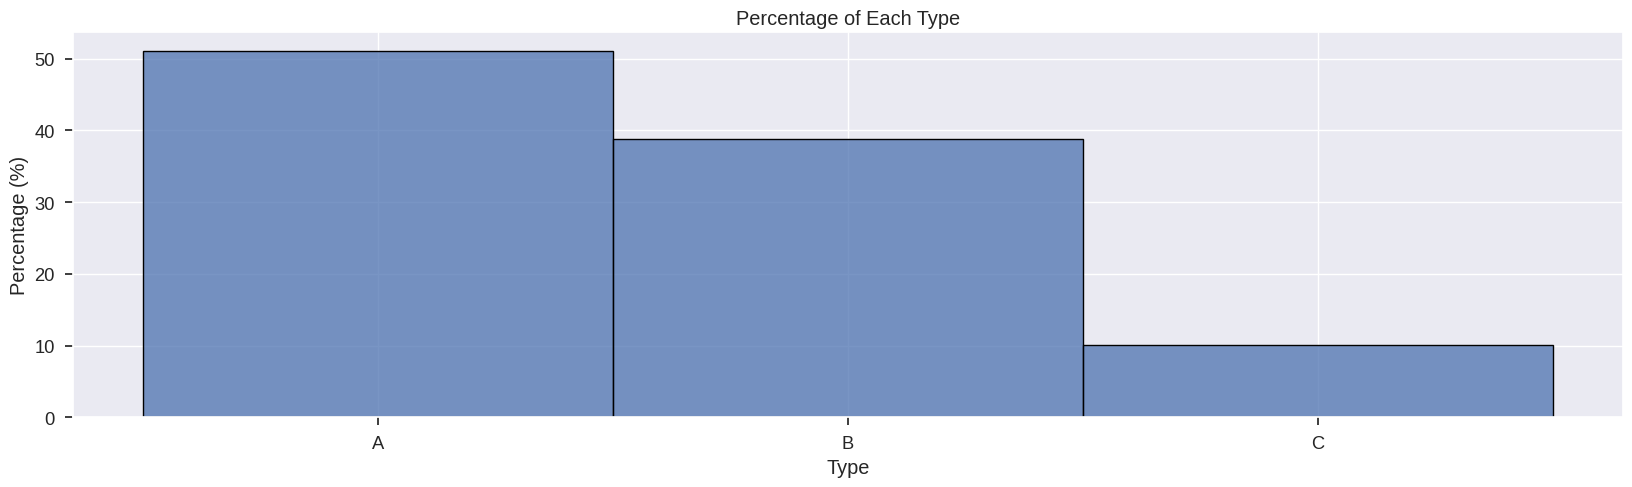

In [270]:
# What about type ?
plt.figure(figsize=(20,5))
sns.histplot(data["Type"], stat='percent', discrete=True)
plt.title("Percentage of Each Type")
plt.xlabel("Type")
plt.ylabel("Percentage (%)")
plt.show()

In [271]:
# Mapping to numeric values
data['IsHoliday'] = data['IsHoliday'].map({
    True: 1,
    False: 0
})

data['Type'] = data['Type'].map({
    'A': 0,
    'B': 1,
    'C': 2
})

In [272]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


**Feature Enginnering**

---



In [273]:
# Extract Y-M-W-D-DOW-DOY-S-L1(week ago)-L4(Month ago)-RM4(Month ago but mean)
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Week"] = data["Date"].dt.isocalendar().week
data["Day"] = data["Date"].dt.day
data["DayOfWeek"] = data["Date"].dt.dayofweek
data["DayOfYear"] = data["Date"].dt.dayofyear

def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall

data["Season"] = data["Month"].apply(get_season)

data = data.sort_values(["Store", "Dept", "Date"])

data["Lag_1"] = data.groupby(["Store", "Dept"])["Weekly_Sales"].shift(1)
data["Lag_4"] = data.groupby(["Store", "Dept"])["Weekly_Sales"].shift(4)

data["Rolling_Mean_4"] = data.groupby(["Store", "Dept"])["Weekly_Sales"].transform(lambda x: x.rolling(4).mean())

In [274]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Year,Month,Week,Day,DayOfWeek,DayOfYear,Season,Lag_1,Lag_4,Rolling_Mean_4
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,4,36,0,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,2010,2,6,12,4,43,0,24924.50,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,2010,2,7,19,4,50,0,46039.49,NaN,NaN
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,2010,2,8,26,4,57,0,41595.55,NaN,32990.77
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,2010,3,9,5,4,64,1,19403.54,24924.5,32216.62


In [276]:
# Nulls ?
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [277]:
# Clean it again
data.dropna(inplace=True)

In [278]:
# Prefect ?
data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [279]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Year,Month,Week,Day,DayOfWeek,DayOfYear,Season,Lag_1,Lag_4,Rolling_Mean_4
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,2010,3,9,5,4,64,1,19403.54,24924.50,32216.6200
5,1,1,2010-03-12,21043.39,0,57.79,2.667,0.0,0.0,0.0,...,2010,3,10,12,4,71,1,21827.90,46039.49,25967.5950
6,1,1,2010-03-19,22136.64,0,54.58,2.720,0.0,0.0,0.0,...,2010,3,11,19,4,78,1,21043.39,41595.55,21102.8675
7,1,1,2010-03-26,26229.21,0,51.45,2.732,0.0,0.0,0.0,...,2010,3,12,26,4,85,1,22136.64,19403.54,22809.2850
8,1,1,2010-04-02,57258.43,0,62.27,2.719,0.0,0.0,0.0,...,2010,4,13,2,4,92,1,26229.21,21827.90,31666.9175


In [280]:
# Why ? -> Some Rows was filled with the Nulls after Future Engineering
data.shape

(408436, 26)

**Seasonal Decomposition**

---



In [281]:
# Time Series Analysis
agg_sales = data.groupby("Date")["Weekly_Sales"].sum()

decomp = seasonal_decompose(agg_sales, model="additive", period=52)

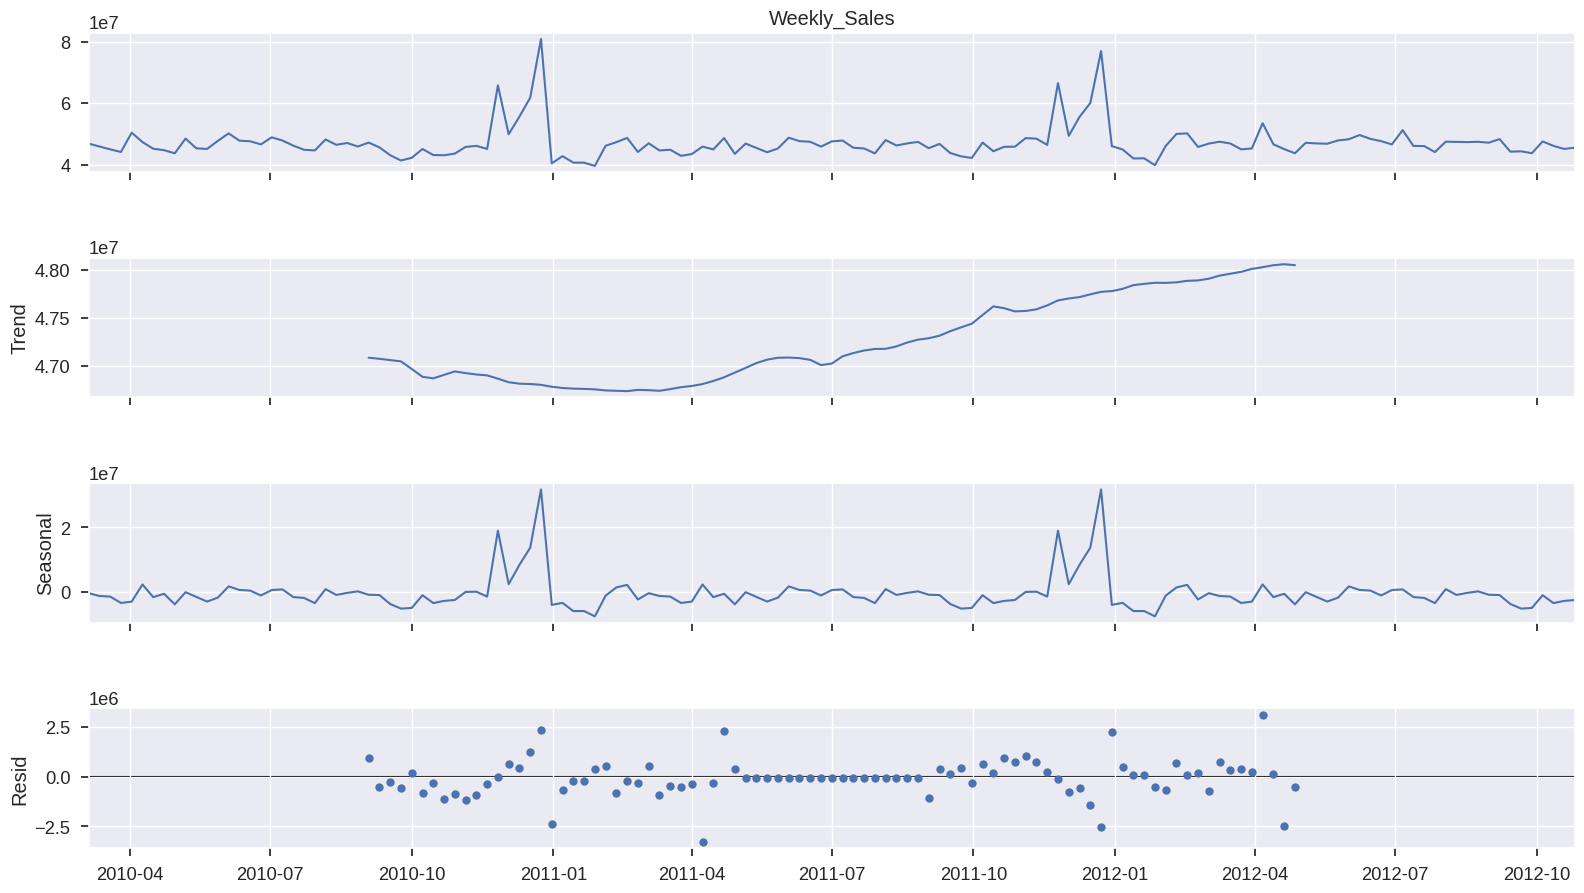

In [282]:
# What ?
fig = decomp.plot()
fig.set_size_inches(18, 10)
plt.show()

In [283]:
# What about trends ?
data["Trend"] = decomp.trend.reindex(data["Date"]).values

data.dropna(inplace=True)

In [284]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Month,Week,Day,DayOfWeek,DayOfYear,Season,Lag_1,Lag_4,Rolling_Mean_4,Trend
30,1,1,2010-09-03,16241.78,0,81.21,2.577,0.0,0.0,0.0,...,9,35,3,4,246,3,15793.87,17508.41,15828.0450,4.708633e+07
31,1,1,2010-09-10,18194.74,1,78.69,2.565,0.0,0.0,0.0,...,9,36,10,4,253,3,16241.78,15536.40,16492.6300,4.707486e+07
32,1,1,2010-09-17,19354.23,0,82.11,2.582,0.0,0.0,0.0,...,9,37,17,4,260,3,18194.74,15740.13,17396.1550,4.706124e+07
33,1,1,2010-09-24,18122.52,0,80.94,2.624,0.0,0.0,0.0,...,9,38,24,4,267,3,19354.23,15793.87,17978.3175,4.704803e+07
34,1,1,2010-10-01,20094.19,0,71.89,2.603,0.0,0.0,0.0,...,10,39,1,4,274,3,18122.52,16241.78,18941.4200,4.696899e+07


In [285]:
# Remove Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [286]:
# Scalling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns)

**Train - Test Split**

---



In [287]:
# Split Data for Modeling
features = ['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'DayOfYear', 'Season', 'Lag_1', 'Lag_4', 'Rolling_Mean_4', 'Trend']

x = data[features]
y = data['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    shuffle=False
)

dates_test = data['Date'].loc[x_test.index]

In [288]:
# Train Model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [289]:
# Try It Now & Performance ?
y_pred_lr = model_lr.predict(x_test)

epsilon = 1e-8

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / np.where(denominator == 0, epsilon, denominator)
    return np.mean(diff) * 100

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, epsilon, y_true))) * 100

def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

smape_lr = smape(y_test, y_pred_lr)
mape_lr = mape(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
rmse_percent_lr = (rmse_lr / (np.mean(np.abs(y_test)) + epsilon)) * 100
r2_lr = r2_score(y_test, y_pred_lr)
n_features = x_test.shape[1]
adj_r2_lr = adjusted_r2(y_test, y_pred_lr, n_features)

metrics_dict_lr = {
    'Metric': ['SMAPE (%)', 'MAPE (%)', 'MAE', 'MSE', 'RMSE', 'RMSE (%)', 'R²', 'Adjusted R²'],
    'Linear Regression': [
        f'{smape_lr:.2f}',
        f'{mape_lr:.2f}',
        f'{mae_lr:.2f}',
        f'{mse_lr:.2f}',
        f'{rmse_lr:.2f}',
        f'{rmse_percent_lr:.2f}',
        f'{r2_lr:.2f}',
        f'{adj_r2_lr:.2f}'
    ]
}

metrics_df_lr = pd.DataFrame(metrics_dict_lr)

metrics_df_lr

,Metric,Linear Regression
0,SMAPE (%),35.43
1,MAPE (%),158968245.75
2,MAE,797.21
3,MSE,2456663.06
4,RMSE,1567.37
5,RMSE (%),18.33
6,R²,0.98
7,Adjusted R²,0.98


In [290]:
# XGBoost ?
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

epsilon = 1e-8

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / np.where(denominator == 0, epsilon, denominator)
    return np.mean(diff) * 100

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, epsilon, y_true))) * 100

def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

smape_best = smape(y_test, y_pred_best)
mape_best = mape(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
rmse_percent = (rmse_best / (np.mean(np.abs(y_test)) + epsilon)) * 100
r2_best = r2_score(y_test, y_pred_best)
n_features = x_test.shape[1]
adj_r2_best = adjusted_r2(y_test, y_pred_best, n_features)

metrics_dict = {
    'Metric': ['SMAPE (%)', 'MAPE (%)', 'MAE', 'MSE', 'RMSE', 'RMSE (%)', 'R²', 'Adjusted R²'],
    'Value': [
        f'{smape_best:.2f}',
        f'{mape_best:.2f}',
        f'{mae_best:.2f}',
        f'{mse_best:.2f}',
        f'{rmse_best:.2f}',
        f'{rmse_percent:.2f}',
        f'{r2_best:.2f}',
        f'{adj_r2_best:.2f}'
    ]
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}


,Metric,Value
0,SMAPE (%),28.31
1,MAPE (%),3167547.51
2,MAE,593.44
3,MSE,1265484.64
4,RMSE,1124.94
5,RMSE (%),13.16
6,R²,0.99
7,Adjusted R²,0.99


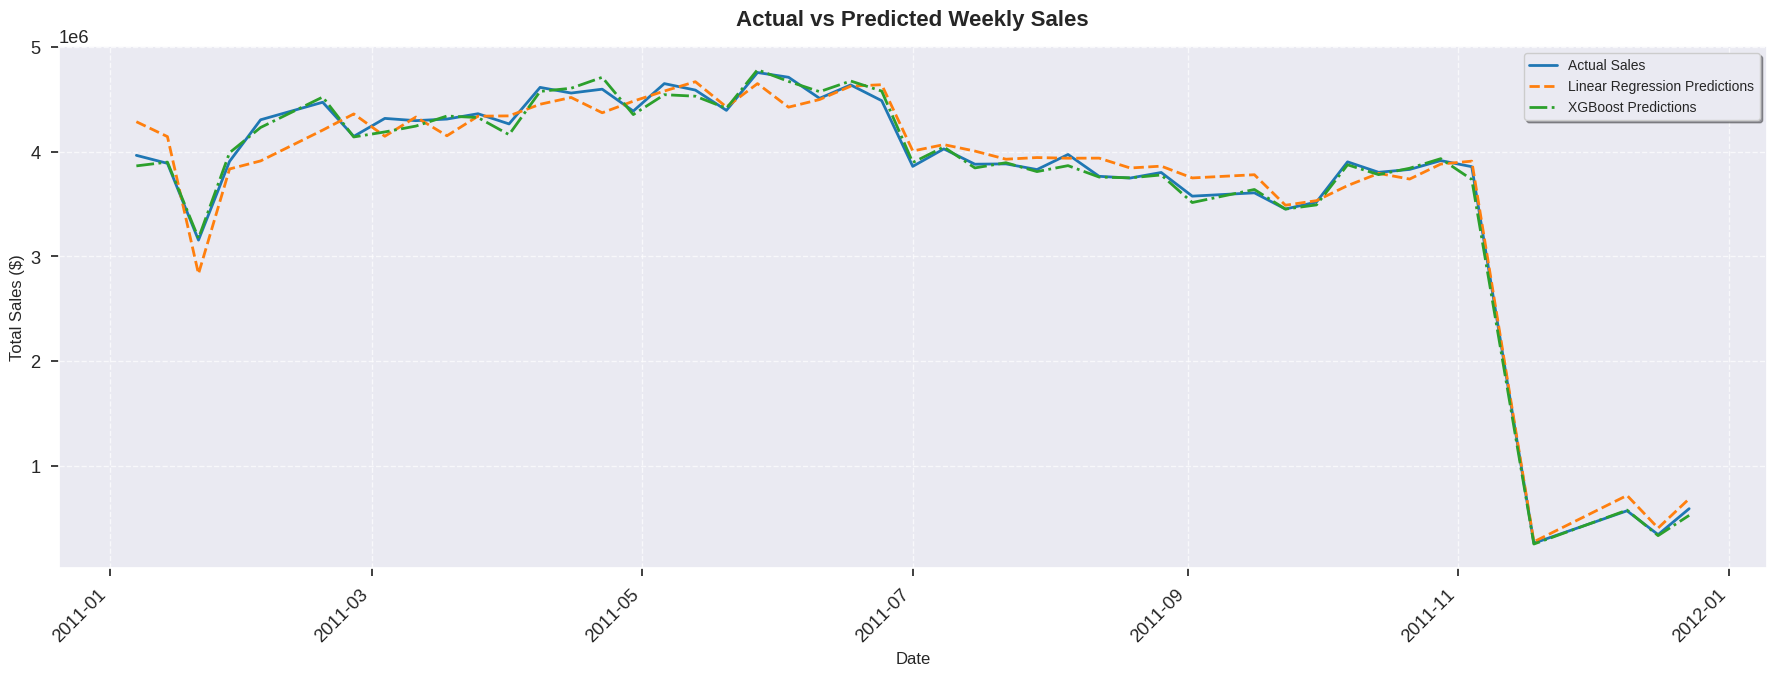

In [291]:
# Results is Good ?
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)

agg_actual = data.loc[x_test.index].groupby('Date')['Weekly_Sales'].sum()
agg_pred_lr = pd.Series(y_pred_lr, index=dates_test).groupby('Date').sum()
agg_pred_xgb = pd.Series(y_pred_best, index=dates_test).groupby('Date').sum()

plt.figure(figsize=(18, 7))
plt.plot(agg_actual.index, agg_actual, label='Actual Sales', color='#1f77b4', linewidth=2)
plt.plot(agg_pred_lr.index, agg_pred_lr, label='Linear Regression Predictions', color='#ff7f0e', linestyle='--', linewidth=2)
plt.plot(agg_pred_xgb.index, agg_pred_xgb, label='XGBoost Predictions', color='#2ca02c', linestyle='-.', linewidth=2)

plt.title('Actual vs Predicted Weekly Sales', fontsize=16, weight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(loc='best', fontsize=10, frameon=True, shadow=True)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()